In [4]:
pip install pyscreenshot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\uttej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import pyscreenshot as ImageGrab
import time

In [6]:
images_folder="hwdp/9/"
  
for i in range(83,84):
   time.sleep(8)
   im=ImageGrab.grab(bbox=(200,350,650,700)) #x1,y1,x2,y2
   print("saved......",i)
   im.save(images_folder+str(i)+'.png')
   print("clear screen now and redraw now........")

saved...... 83
clear screen now and redraw now........


In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\uttej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\uttej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\uttej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
import cv2
import csv
import glob
  
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('ac.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("hwdp/"+str(label)+"/*.png")
    
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
       data=[]
       data.append(label)
       rows, cols = roi.shape
        
       ## Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('ac.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)

In [11]:
import cv2
import csv
import glob
  
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('ac.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("hwdp/"+str(label)+"/*.png")
    
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
       data=[]
       data.append(label)
       rows, cols = roi.shape
        
       ## Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('ac.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)

In [12]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
#0,....,1.....,2.....
#5,3,1,0,2,5,.......
 
data = pd.read_csv('sg.csv')
data = shuffle(data)
print(data)

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
78       0       0       0       0       0       0       0       0       0   
817      8       0       0       0       0       0       0       0       0   
920      9       0       0       0       0       0       0       0       0   
11       0       0       0       0       0       0       0       0       0   
639      6       0       0       0       0       0       0       0       0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
395      3       0       0       0       0       0       0       0       0   
106      1       0       0       0       0       0       0       0       0   
634      6       0       0       0       0       0       0       0       0   
136      1       0       0       0       0       0       0       0       0   
10       0       0       0       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel

In [13]:
X = data.drop(["label"],axis=1)
Y= data["label"]

In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\uttej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


0


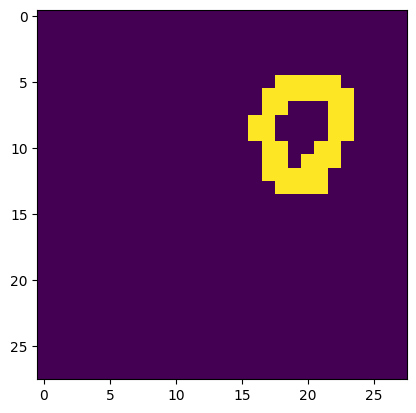

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 41
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

SVM accuracy Caluclation

In [16]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)


In [34]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\uttej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [35]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

In [36]:
from sklearn import metrics
from sklearn.metrics import precision_score, confusion_matrix
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))
conf_matrix = confusion_matrix(test_y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy=  0.985
Confusion Matrix:
[[22  0  0  0  0  0  0  0  0  0]
 [ 0 21  1  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0]
 [ 1  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0]
 [ 1  0  0  0  0 19  0  0  0  0]
 [ 1  1  3  0  1  0 12  0  0  0]
 [ 2  1  0  1  0  0  0 17  0  0]
 [ 0  0  0  0  0  1  0  0 19  0]
 [ 0  0  0  0  0  1  4  0  0 16]]


KNN Accuracy Calculation

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, confusion_matrix

# Create a KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training set
knn_classifier.fit(train_x, train_y)

# Make predictions on the test set
y_pred = knn_classifier.predict(test_x)

# Calculate and print the accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f'Accuracy: {accuracy}')

# Optionally, you can also print the confusion matrix for more detailed information
conf_matrix = confusion_matrix(test_y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.94
Confusion Matrix:
[[22  0  0  0  0  0  0  0  0  0]
 [ 0 21  1  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  1  0  0]
 [ 0  1  0 18  0  0  0  0  0  0]
 [ 0  1  0  0 21  0  0  0  0  0]
 [ 0  0  0  2  0 17  0  0  0  1]
 [ 1  0  0  0  0  0 17  0  0  0]
 [ 0  3  0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  1  0 20]]


Random Forest accuracy Calculation

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=2, random_state=42)

# Train the classifier on the training set
rf_classifier.fit(train_x, train_y)

# Make predictions on the test set
y_pred = rf_classifier.predict(test_x)

# Calculate and print the accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f'Accuracy: {accuracy}')
conf_matrix = confusion_matrix(test_y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.905
Confusion Matrix:
[[22  0  0  0  0  0  0  0  0  0]
 [ 0 21  1  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0]
 [ 1  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0]
 [ 1  0  0  0  0 19  0  0  0  0]
 [ 1  1  3  0  1  0 12  0  0  0]
 [ 2  1  0  1  0  0  0 17  0  0]
 [ 0  0  0  0  0  1  0  0 19  0]
 [ 0  0  0  0  0  1  4  0  0 16]]
